In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:

def combine_csv_by_id_name(input_file, output_file):
  
  df = pd.read_csv(input_file)

  combined_df = df.groupby('id')['name'].apply(lambda x: ','.join(x)).reset_index()

  combined_df.to_csv(output_file, index=False)
combine_csv_by_id_name('actors.csv', 'combined_actors.csv')

In [6]:
def combine_csv_by_id_country(input_file, output_file):

  df = pd.read_csv(input_file)

  combined_df = df.groupby('id')['country'].agg(lambda x: ','.join(x)).reset_index()

  combined_df.to_csv(output_file, index=False)


combine_csv_by_id_country('countries.csv', 'combined_countries.csv')


In [7]:
import csv

def combine_csv_by_id(input_file, output_file):

  combined_data = {}
  with open(input_file, "r") as csvfile:
    reader = csv.reader(csvfile)
    # Skip the header row
    next(reader)
    for row in reader:
      id = row[0]
      theme = row[1]
      if id in combined_data:
        combined_data[id].append(theme)
      else:
        combined_data[id] = [theme]

  output_data = [["id", "theme"]]
  for id, themes in combined_data.items():
    theme_string = ", ".join(themes)
    output_data.append([id, theme_string])

  with open(output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(output_data)

  print(f"Combined data written to {output_file}")

input_file = "themes.csv"
output_file = "combined_themes.csv"
combine_csv_by_id(input_file, output_file)


Combined data written to combined_themes.csv


In [8]:
combine_csv_by_id("genres.csv", "combined_genres.csv")

Combined data written to combined_genres.csv


In [9]:

file_paths = ['movies.csv', 'combined_actors.csv', 'combined_countries.csv', 'combined_genres.csv', 'combined_themes.csv']

dataframes = []

# Loop through the file paths and read each CSV file into a DataFrame
for file_path in file_paths:
  df = pd.read_csv(file_path)
  dataframes.append(df)


merged_df = dataframes[0] 
for df in dataframes[1:]:
  merged_df = pd.merge(merged_df, df, on='id', how='outer')

merged_df.to_csv('merged_data.csv', index=False)

filtered_df = merged_df[merged_df['country'].notna() & merged_df['country'].str.contains('USA', case=False)]
filtered_df.dropna(inplace=True)

filtered_df.to_csv('usa_data.csv', index=False)


C:\Users\clayt\AppData\Local\Temp\ipykernel_25020\829426496.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [95]:
theme_dummies = filtered_df['theme_x'].str.get_dummies(sep=', ')

# Concatenate the one-hot encoded columns with the original DataFrame
filtered_df = pd.concat([filtered_df, theme_dummies], axis=1)
print(filtered_df)

             id                             name_x    date  \
0       1000001                             Barbie  2023.0   
2       1000003  Everything Everywhere All at Once  2022.0   
3       1000004                         Fight Club  1999.0   
4       1000005                       Interstellar  2014.0   
5       1000006                              Joker  2019.0   
...         ...                                ...     ...   
101581  1101582                     Alien Conquest  2021.0   
102514  1102515                  Prelude to Axanar  2014.0   
105689  1105690                         God's Army  2000.0   
108775  1108776                     The Grace Card  2010.0   
119473  1119474                  Tekken: Bloodline  2022.0   

                                                  tagline  \
0                        She's everything. He's just Ken.   
2        The universe is so much bigger than you realize.   
3                                 Mischief. Mayhem. Soap.   
4       Man

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer


In [96]:
X = filtered_df[["date", "minute"] + list(theme_dummies.columns)]
y = filtered_df["rating"]
print(X)

          date  minute  Action  Action  Adventure  Adventure  Animation  \
0       2023.0   114.0       0       0          1          1          0   
2       2022.0   140.0       1       1          1          1          0   
3       1999.0   139.0       0       0          0          0          0   
4       2014.0   169.0       0       0          1          1          0   
5       2019.0   122.0       0       0          0          0          0   
...        ...     ...     ...     ...        ...        ...        ...   
101581  2021.0    87.0       1       1          0          0          0   
102514  2014.0    21.0       0       0          0          0          0   
105689  2000.0   108.0       0       0          0          0          0   
108775  2010.0   101.0       0       0          0          0          0   
119473  2022.0   912.0       0       0          0          0          1   

        Animation  Comedy  Comedy  ...  Science Fiction  Science Fiction  \
0               0      

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("First few elements of y_train:", y_train[:10])

Shape of X_train: (10881, 40)
Shape of y_train: (10881,)
First few elements of y_train: 10377    2.86
4471     3.80
2129     3.32
906      2.79
16731    3.08
953      3.27
54678    2.46
35201    3.36
15744    3.05
13607    2.74
Name: rating, dtype: float64


In [99]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.1927


In [102]:
first_entry = X_train.iloc[0] 
print(first_entry)

date               2004.0
minute               86.0
Action                0.0
Action                0.0
Adventure             0.0
Adventure             0.0
Animation             0.0
Animation             0.0
Comedy                0.0
Comedy                0.0
Crime                 0.0
Crime                 0.0
Documentary           0.0
Documentary           0.0
Drama                 1.0
Drama                 1.0
Family                0.0
Family                0.0
Fantasy               0.0
Fantasy               0.0
History               0.0
History               0.0
Horror                0.0
Horror                0.0
Music                 0.0
Music                 0.0
Mystery               0.0
Mystery               0.0
Romance               1.0
Romance               1.0
Science Fiction       0.0
Science Fiction       0.0
TV Movie              0.0
TV Movie              0.0
Thriller              0.0
Thriller              0.0
War                   0.0
War                   0.0
Western     

In [118]:
new_data = {
    'date': [2024.0],
    'minute': [167.0],
    'Action': [1.0],
    'Science Fiction': [1.0]
}

# Create a DataFrame from the dictionary
new_data_df = pd.DataFrame(new_data)

# Fill zeros for all other theme columns
theme_columns = [col for col in filtered_df.columns if col not in ['date', 'minute', 'Action', 'Science Fiction']]
for column in theme_columns:
    new_data_df[column] = 0.0

# Reorder columns to match the original DataFrame's order
new_data_df = new_data_df[filtered_df.columns]

# Print the new test data point
new_data_features = new_data_df[["date", "minute"] + list(theme_dummies.columns)]

# Make prediction
prediction = regressor.predict(new_data_features)
print(prediction)

[2.76184456]


In [107]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

for i, feature_name in enumerate(X_train.columns):
    print(f"Feature: {feature_name}, Importance: {feature_importances[i]}")


Feature: date, Importance: 0.29043848409355005
Feature: minute, Importance: 0.2778505425441498
Feature: Action, Importance: 0.011703056446202656
Feature: Action, Importance: 0.011235682839982393
Feature: Adventure, Importance: 0.008533547946722323
Feature: Adventure, Importance: 0.008189287810357309
Feature: Animation, Importance: 0.008612198422560698
Feature: Animation, Importance: 0.008369390510258447
Feature: Comedy, Importance: 0.01165249057830578
Feature: Comedy, Importance: 0.011875824306294521
Feature: Crime, Importance: 0.010376310414407178
Feature: Crime, Importance: 0.009739365932093822
Feature: Documentary, Importance: 0.026939740748641687
Feature: Documentary, Importance: 0.028149153220886153
Feature: Drama, Importance: 0.0385297366305656
Feature: Drama, Importance: 0.04930353286462626
Feature: Family, Importance: 0.005818285192779462
Feature: Family, Importance: 0.0057899852627743675
Feature: Fantasy, Importance: 0.008426180709725164
Feature: Fantasy, Importance: 0.0088767

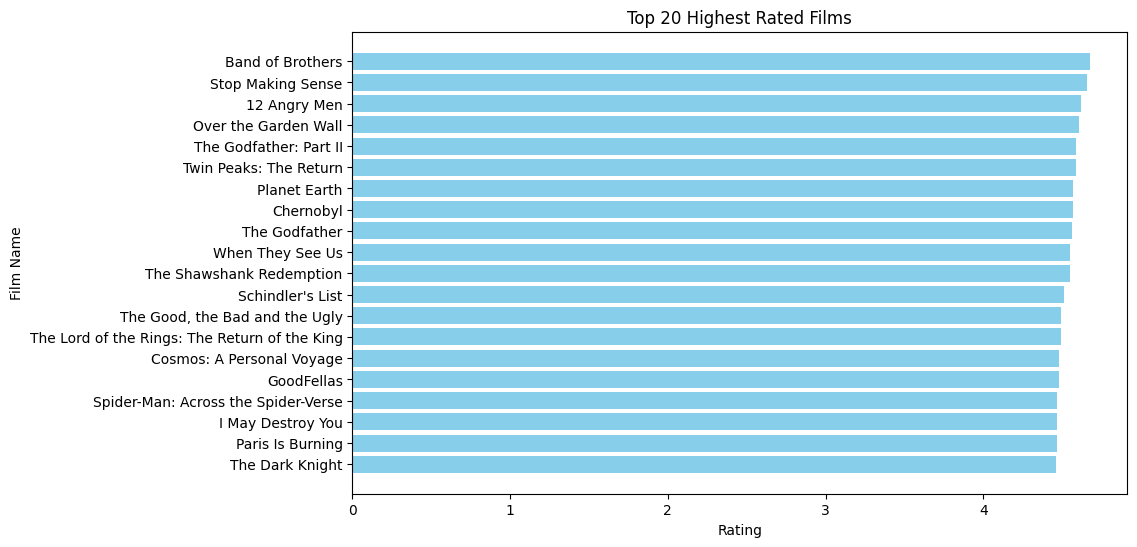

In [123]:
import matplotlib.pyplot as plt

sorted_df = filtered_df.sort_values(by='rating', ascending=False)

top_n = 20 
top_films = sorted_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_films['name_x'], top_films['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Film Name')
plt.title('Top {} Highest Rated Films'.format(top_n))
plt.gca().invert_yaxis()
plt.show()


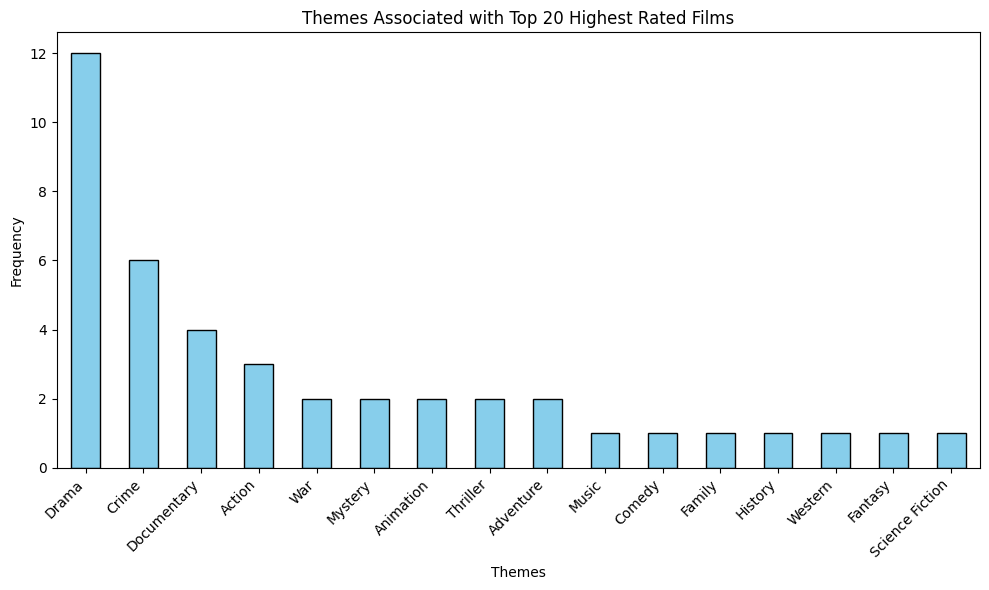

In [122]:
import matplotlib.pyplot as plt

top_n = 20 
top_films = filtered_df.sort_values(by='rating', ascending=False).head(top_n)

top_themes = top_films['theme_x'].str.split(',').explode().str.strip()

theme_counts = top_themes.value_counts()

plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.title('Themes Associated with Top {} Highest Rated Films'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


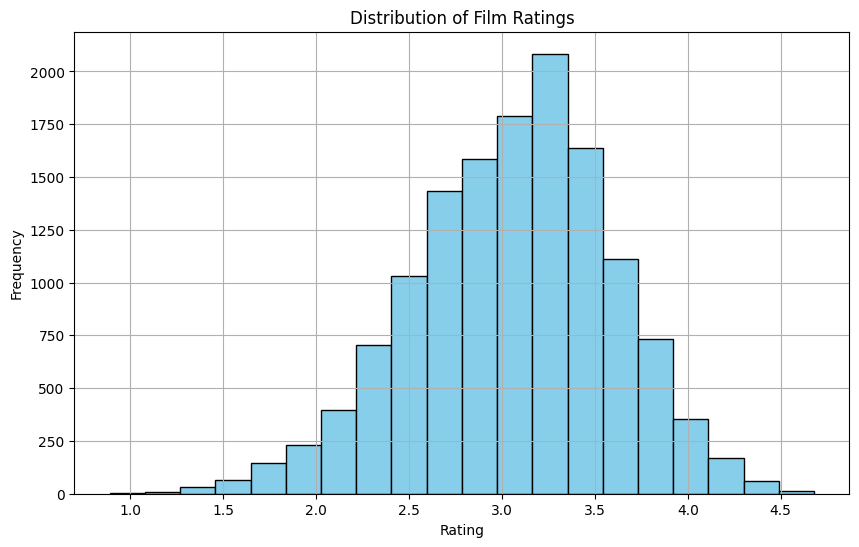

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Film Ratings')
plt.grid(True)
plt.show()


In [92]:
print(filtered_df["theme_x"])

0                 Comedy, Fantasy, Adventure
2         Science Fiction, Action, Adventure
3                                      Drama
4          Science Fiction, Drama, Adventure
5                     Thriller, Drama, Crime
                         ...                
101581               Science Fiction, Action
102514                  Science Fiction, War
105689                                 Drama
108775                                 Drama
119473                             Animation
Name: theme_x, Length: 13602, dtype: object


C:\Users\clayt\AppData\Local\Temp\ipykernel_25020\2492472859.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Theme', y='rating', data=melted_theme_df, palette='viridis')
c:\Users\clayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\clayt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\clayt\AppData\Local\Programs\Python\Python312\Lib\site-

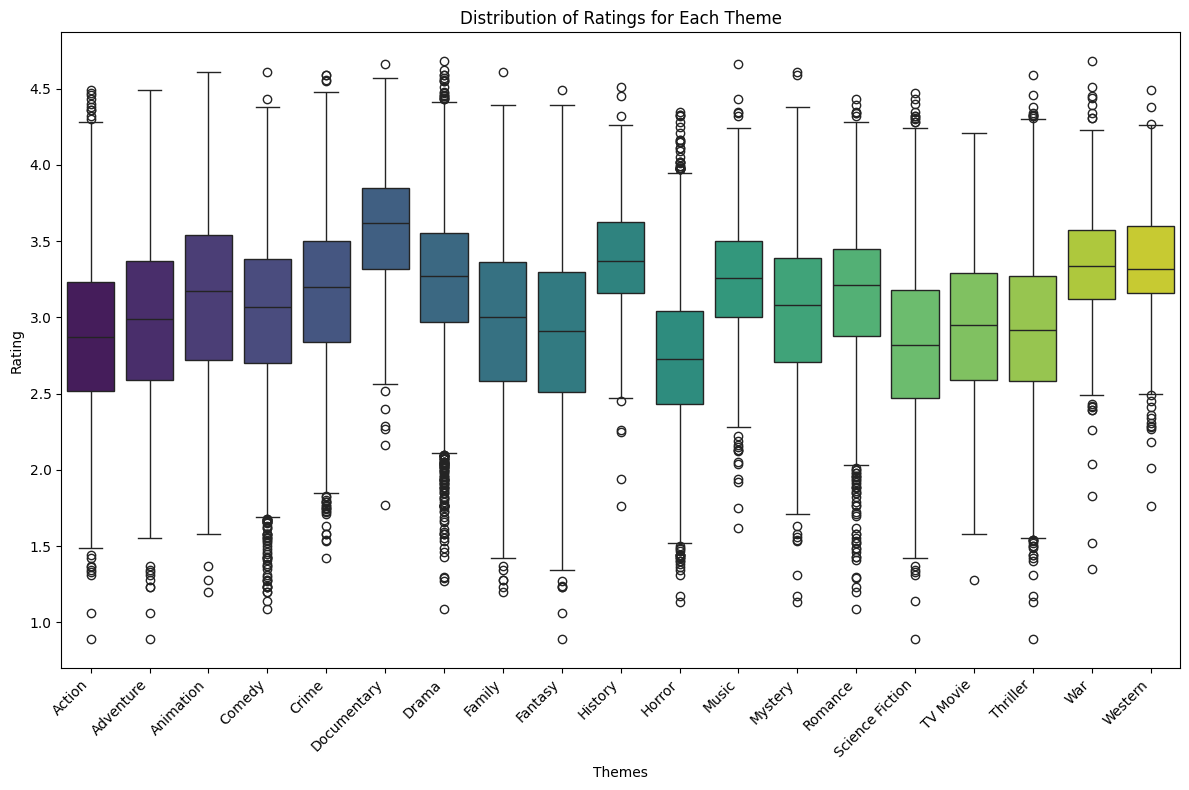

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

theme_df = filtered_df.copy()

themes = theme_df['theme_x'].str.get_dummies(sep=', ')

theme_df = pd.concat([theme_df, themes], axis=1)

melted_theme_df = theme_df.melt(id_vars=['rating'], value_vars=themes.columns, var_name='Theme', value_name='Presence')

melted_theme_df = melted_theme_df[melted_theme_df['Presence'] == 1]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Theme', y='rating', data=melted_theme_df, palette='viridis')
plt.xlabel('Themes')
plt.ylabel('Rating')
plt.title('Distribution of Ratings for Each Theme')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [120]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(X, y)

predictions = tree_regressor.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.007615754843475398
R-squared: 0.973733676771311


In [121]:
import pandas as pd

new_data = {
    'date': [2024.0],
    'minute': [167.0],
    'Action': [1.0],
    'Science Fiction': [1.0]
}

new_data_df = pd.DataFrame(new_data)

# Fill zeros for all other theme columns
theme_columns = [col for col in filtered_df.columns if col not in ['date', 'minute', 'Action', 'Science Fiction']]
for column in theme_columns:
    new_data_df[column] = 0.0

new_data_df = new_data_df[X.columns]

prediction = tree_regressor.predict(new_data_df)
print(prediction)


[2.82]
